# ECE 590, Fall 2019 
## Problem Set 2 

## Full name: Bingying Liu


### Problem 1 (Conditional Multivariate Gaussian Distribution)

**(a) Derive the conditional PDF of $x_{2}$ given $x_{1}$ = a where a is a constant.**

**1. Derivation**: 

Since all contional distributions of a multivariate normal distributions are normal, we only need to derive mean vector and variance of the conditional distribution. Given $x = (x_{1}, x_{2})$, thus $\mu = (\mu_{1}, \mu{2})$ and $\Sigma = \bigl( \begin{smallmatrix}\Sigma_{11} & \Sigma_{21}\\ \Sigma_{12} & \Sigma_{22} \end{smallmatrix}\bigr)$.

Suppose we have a linear combination $z = Cx = C_{1}x_{1} + C_{2}x_{2}$ and the whole vector $z$ is independent with $x_{1}$. 
This results in $P(z|x_{1}) = P(z)$, $var(z|x_{1}) = var(z)$ and $E(z|x_{1}) = E(z)$.

We take $C_{2} = I$ and since $z$ and $x_{1}$ are uncorrelated, therefore $cov(z, x_{1}) = cov(x_{2}, x_{1}) + C_{1}cov(x_{1}, x_{1}) = \Sigma_{21} + C_{1}\Sigma_{11} = 0$. Thus if $\Sigma_{11}$ is invertible, then $C_{1} = -\Sigma_{21}\Sigma_{11}^{-1}$.

Since $E(z) = C_{1}\mu_{1} + \mu{2}$, thus

$\begin{align*}
E(x_{2} \mid x_{1}) &= E((z - C_{1}x_{1})\mid x_{1}) \\
&= E(z \mid x_{1}) - E(C_{1}x_{1}\mid x_{1}) \\
&= E(z) - C_{1}x_{1} \\
&= C_{1}\mu_{1} + \mu_{2} - C_{1}x_{1}\\
&= \mu_{2} + C_{1}(\mu_{1} - x_{1}) \\
&= \mu_{2} + \Sigma_{21}\Sigma_{11}^{-1}(x_{1} - \mu_{1})
\end{align*}$ 

$\begin{align*}
var(x_{2}\mid x_{1}) &= var(z) \\
&= var(C_{1}x_{1} + x_{2}) \\
&= C_{1}var(x_{1})C_{1}' + var(x_{2}) + cov(x_{1}, x_{2})C_{1}' + C_{1}cov(x_{2}, x_{1})\\
&= \Sigma_{21}\Sigma_{11}^{-1}\Sigma_{11}\Sigma_{11}^{-1}\Sigma_{12} + \Sigma_{22} -2\Sigma_{21}\Sigma_{11}^{-1}\Sigma_{12}\\
&= \Sigma_{22} -\Sigma_{21}\Sigma_{11}^{-1}\Sigma_{12}
\end{align*}$ 

**2. When $x_{1} = a$ where $a$ is a constant vector**: 

$x_{1} = a$, thus $\mu_{1} = a$ and $\Sigma_{11} = 0$.

Therefore, plugging in the value above into $E(x_{2} \mid x_{1})$ and $var(x_{2}\mid x_{1})$: $E(x_{2} \mid x_{1}) = \mu_{2}$ and $var(x_{2}\mid x_{1}) = \Sigma_{22}$.

Thus, the conditional PDF of $x_{2}$ given $x_{1}$ = a is
$\begin{gather*}
f(x_{2} \mid x_{1}) = (2\pi)^{-D/2} det(\Sigma_{22})^{-1/2} e^{-\frac{1}{2}(x-\mu_{2})^{T}\Sigma_{22}^{-1}(x-\mu_{2})}
\end{gather*}$

**(b) Compute the mean vector and the covariance matrix of the conditional PDF**

$\begin{align*}
E(x_{2} \mid x_{1}) &= \begin{bmatrix} 1 \\ 2 \end{bmatrix} + 0.25 * I_{2} * I_{2} * (\begin{bmatrix} 1 \\ 1 \end{bmatrix} - \begin{bmatrix} 1 \\ 1 \end{bmatrix}) \\
&= \begin{bmatrix} 1 \\ 2 \end{bmatrix}
\end{align*}$ 

$\begin{align*}
var(x_{2}\mid x_{1}) &= 1.25 * I_{2} - 0.25 * * I_{2} - 0.25 * I_{2} * 0.25 * I_{2} \\
&= 1.25 * I_{2} - 0.25^{2} *  I_{2} - 0.25 \\
&= 1.1875 I_{2}
\end{align*}$ 

### Problem 2 (Gaussian Mixture Model)

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn import mixture

In [51]:
mean1 = [0, 0]
cov1 = [[0.2, 0.1], [0.1, 0.2]]  
mean2 = [0, 2]
cov2 = [[0.1, -0.15], [-0.15, 0.3]]  
mean3 = [2, 0]
cov3 = [[0.3, 0.05], [0.05, 0.3]]  
mean4 = [2, 2]
cov4 = [[0.15, 0], [0, 0.15]] 

In [60]:
gauss1 = np.random.multivariate_normal(mean1, cov1, round(1000/8))
gauss2 = np.random.multivariate_normal(mean2, cov2, round(1000/8))
gauss3 = np.random.multivariate_normal(mean3, cov3, round(1000/4))
gauss4 = np.random.multivariate_normal(mean4, cov4, round(1000/2))
GMM_new = np.vstack((gauss1, gauss2, gauss3, gauss4))

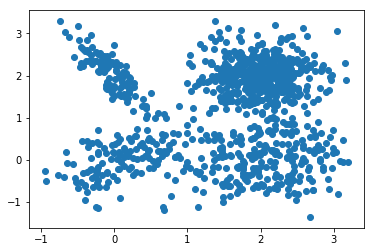

In [62]:
# Visualize the GMM dataset
plt.scatter(GMM_new[:,0], GMM_new[:,1])

In [66]:
log_likelihood_all = []
for i in range(7):
    g = mixture.GaussianMixture(n_components=i+1, covariance_type='full')
    g.fit(GMM_new)
    log_likelihood_all.append(g.score(GMM_new))
log_likelihood_all

[-2.8447456731518788,
 -2.598703371333242,
 -2.281021686905863,
 -2.2172036836432034,
 -2.2166452798840357,
 -2.2156146946877215,
 -2.209920104709293]

Text(0.5,1,'Log likelihood vs. Number of clusters')

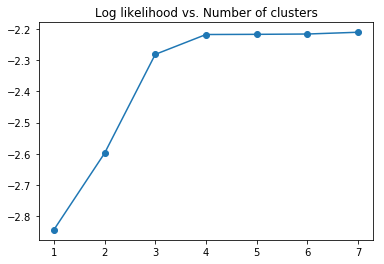

In [67]:
plt.plot(np.arange(7)+1, log_likelihood_all, marker='o', linestyle='solid')
plt.title('Log likelihood vs. Number of clusters')

### Problem 3 (Bias-variance trade-off)

**1. Plot the sum-of-squares error with respect to M computed on training and test datasets**

In [68]:
# Generate train and test data
x_train = np.arange(0, 1, 0.2)
t_train = np.asarray([math.sin(2*math.pi*xi) + math.cos(4*math.pi*xi) for xi in x_train])
x_test = np.arange(0, 1, 0.01)
t_test = np.asarray([math.sin(2*math.pi*xi) + math.cos(4*math.pi*xi) for xi in x_test])

In [69]:
import warnings
warnings.simplefilter('ignore', np.RankWarning)
import numpy.polynomial.polynomial as poly

In [71]:
SSE_train_all = []
SSE_test_all = []
for i in range(16):
    p = np.polyfit(x_train,t_train,i) # polynomial coefficients
    # 1) For training data set, generate SSE
    SSE_train = np.sum((np.polyval(p, x_train) - t_train)**2) #polyval: evaluate a polynomial at specific values
    SSE_train_all.append(SSE_train)
    # 2) For test data set, generate SSE
    SSE_test = np.sum((np.polyval(p, x_test) - t_test)**2)
    SSE_test_all.append(SSE_test)

Text(0.5,1,'Training and Test Sum-of-square Errors')

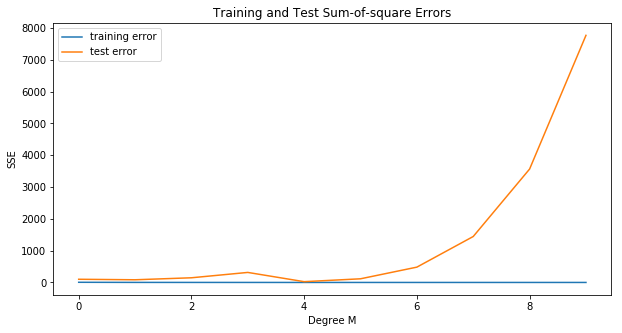

In [76]:
# Zoom-in plot for SSE with 10 degrees
plt.figure(figsize = (10,5))
plt.plot(SSE_train_all[0:10], label = 'training error')
plt.plot(SSE_test_all[0:10], label = 'test error')
plt.xlabel('Degree M')
plt.ylabel('SSE')
plt.legend()
plt.title('Training and Test Sum-of-square Errors')

Text(0.5,1,'Training and Test Sum-of-square Errors')

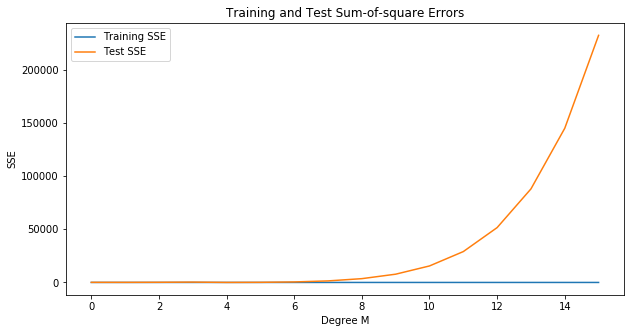

In [77]:
# Zoom-out plot for SSE with all 16 degrees
plt.figure(figsize = (10,5))
plt.plot(SSE_train_all[0:16], label = "Training SSE")
plt.plot(SSE_test_all[0:16], label = "Test SSE")
plt.xlabel('Degree M')
plt.ylabel('SSE')
plt.legend()
plt.title('Training and Test Sum-of-square Errors')

**2. Plot the sum-of-squares error with respect to $ln(\lambda)$ computed on both training and test data sets**

In [86]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

In [91]:
M = 14
norm_l = np.linspace(0.01, 50, 100)
lambda_l = np.log(norm_l)
SSE_train_reg_all = []
SSE_test_reg_all = []

preprocessor = PolynomialFeatures(14)
x_train_processed = preprocessor.fit_transform(x_train.reshape(-1,1))
x_test_processed = preprocessor.fit_transform(x_test.reshape(-1,1))

for lamb in norm_l:
    model = Ridge(alpha = lamb)
    model.fit(x_train_processed, t_train)
    
    # training
    t_train_hat = model.predict(x_train_processed)
    SSE_train_reg = np.sum((t_train_hat - t_train)**2)
    SSE_train_reg_all.append(SSE_train_reg)
    
    # test
    t_test_hat = model.predict(x_test_processed)
    SSE_test_reg = np.sum((t_test_hat - t_test)**2)
    SSE_test_reg_all.append(SSE_test_reg)

Text(0.5,1,'Bias Variance Tradeoff')

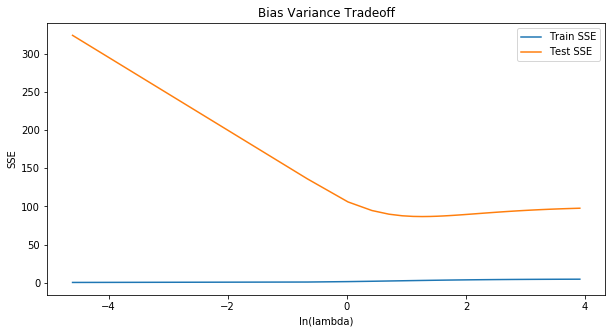

In [94]:
plt.figure(figsize = (10,5))
plt.plot(lambda_l, SSE_train_reg_all, linestyle='solid', label = "Train SSE")
plt.plot(lambda_l, SSE_test_reg_all, linestyle='solid', label = "Test SSE")
plt.xlabel('ln(lambda)')
plt.ylabel('SSE')
plt.legend()
plt.title('Bias Variance Tradeoff')

### Problem 4 (Maximum Likelihood Estimation of Marchenko-Pastur Distribution)

The Marchenko Pastur distribution is defined as:

$\begin{align*}
\mu(\mathbf{x}; c,\sigma^2) &= \prod_{i=1}^{n} \mu (x_i|c,\sigma^2) \\
&= \prod_{i=1}^{n} \dfrac{1}{2\pi\sigma^2} \dfrac{ \sqrt{(c_+-x_i)(x_i-c_-)} }{cx_i} \mathbb{I}_{x_i \in [c_-,c_+]} \\
&= \Big(\dfrac{1}{2\pi\sigma^2c}\Big)^n  \prod_{i=1}^{n}
\dfrac{ \sqrt{(c_+-x_i)(x_i-c_-)} }{x_i} \mathbb{I}_{x_i \in [c_-,c_+]} \\
&= \Big(\dfrac{1}{2\pi\sigma^2c}\Big)^n \prod_{i=1}^{n}
\dfrac{1}{x_i} \prod_{i=1}^{n} \sqrt{(c_+-x_i)(x_i-c_-)}  \mathbb{I}_{x_i \in [c_-,c_+]}
\end{align*}$


$\begin{align*}
\ell(\mathbf{x};c,\sigma^2) &=\log(\mu(c,\sigma^2;\mathbf{x})) \\
&= -n\log(2\pi\sigma^2c) - \sum_{i=1}^{n} \log(x_i) + \dfrac{1}{2} \sum_{i=1}^{n} (\log(c_+-x_i)+\log(x_i-c_-))
\end{align*}$


$\begin{align*}
\frac{\partial\ell}{\partial\sigma^2} = \frac{-n}{2\pi\sigma^2c}2\pi c + \dfrac{1}{2} \sum_{i=1}^{n}\frac{(1+\sqrt{c})^2}{\sigma^2(1+\sqrt{c})^2-x_i} - \frac{(1-\sqrt{c})^2}{x_i-\sigma^2(1-\sqrt{c})^2} = 0
\end{align*}$

$\begin{align*}
\frac{\partial\ell}{\partial c} = \frac{-n}{2\pi\sigma^2c}2\pi\sigma^2 + \dfrac{1}{2} \sum_{i=1}^{n}\frac{\sigma^2(1+c^{-1/2})}{\sigma^2(1+\sqrt{c})^2-x_i} - \frac{\sigma^2(1-c^{-1/2})}{x_i-\sigma^2(1-\sqrt{c})^2} = 0
\end{align*}$

Thus, we can find the MLE of c and $\sigma^2$.

### Problem 5 (Minimizing Minkowski Loss)

**1. Show that $E\big[L\big]$ is minimized by the median of the conditional distribution $p(t|x)$**

Our goal is to minimize $E\big[L\big]$ with respect $y(\mathbf{x})$,

$$\begin{equation*}
E\big[L\big] = \iint \mid t-y(\mathbf{x})\mid p(\mathbf{x},t) \,d\mathbf{x} \,dt = \int p(\mathbf{x}) \bigg( \int\mid t-y(\mathbf{x})\mid p(\mathbf{x}\mid t) \,dt \bigg)  \,d\mathbf{x}
\end{equation*}$$

Since $p(\mathbf{x})$ is always non-negative and is not dependent on $y(\mathbf{x})$, we only have to minimize the inner integral:

$$\begin{align*}
\int \mid t-y(\mathbf{x})\mid p(\mathbf{x}\mid t) \,dt &= \int_{y(\mathbf{x})}^{\infty} (t-y(\mathbf{x})) p(\mathbf{x}\mid t) \,dt + \int_{-\infty}^{y(\mathbf{x})} (y(\mathbf{x})-t) p(\mathbf{x}\mid t) \,dt 
\end{align*}$$

Differentiating the integral above with respect $y(\mathbf{x})$ and setting it to zero:
$$
- \int_{y(\mathbf{x})}^{\infty} p(\mathbf{x}\mid t) \,dt + \int_{-\infty}^{y(\mathbf{x})} p(\mathbf{x}\mid t) \,dt = 0
$$


To satisfy that derivative of this integral is equal to 0, ${y(\mathbf{x})}$ is median of $p(t|x)$.

**2. Show that $E\big[L\big]$ is minimized by the mode of the conditional distribution $p(t|x)$**

As q becomes infinitely close to 0, the quantity $\mid t - y(x)\mid^{q}$ will be infinitely close to 1 everywhere except a small area around $t = y(x)$ where it falls to 0. We obtain the biggest reduction by choosing the location of the notch to coincide with the largest value of $p(t)$, with the (conditional) mode.

### Problem 6 (Nonlinear Basis Functions)

**1. Could you find a single line that separates two data sets?**

In [98]:
# Generate GMM-1 data
gmm1_mean1 = [0, 0]
gmm1_cov1 = [[0.1, 0],[0, 0.1]]
gmm1 = np.random.multivariate_normal(gmm1_mean1, gmm1_cov1, 100)

In [99]:
# Generate GMM-2 data
gmm2_mean1 = [-1, -1]
gmm2_cov1 = [[0.1, 0],[0, 0.1]]
gmm2_mean2 = [1, 1]
gmm2_cov2 = [[0.1, 0],[0, 0.1]]

gmm21 = np.random.multivariate_normal(gmm2_mean1, gmm2_cov1, round(200*0.5))
gmm22 = np.random.multivariate_normal(gmm2_mean2, gmm2_cov2, round(200*0.5))
gmm2 = np.vstack((gmm21,gmm22))

Text(0.5,1,'Scatter Plot of GMM-1 and GMM-2')

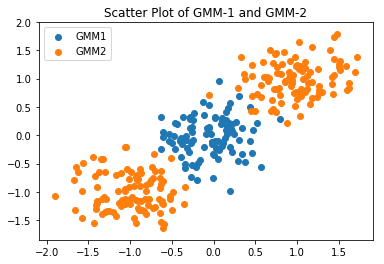

In [135]:
# Plot the generated GMM-1 and GMM-2 data
plt.scatter(gmm1[:,0], gmm1[:,1], label = "GMM1")
plt.scatter(gmm2[:,0], gmm2[:,1], label = "GMM2")
plt.legend()
plt.title('Scatter Plot of GMM-1 and GMM-2')

No, I can't find a single line that separates the two data sets. We need at least two lines.

**2. What do you observe from the transformation?**

In [132]:
gmm1_transformed = np.zeros(shape=(100,2))
gmm2_transformed = np.zeros(shape=(200,2))

for i in range(100):
    gmm1_transformed[i][0] = np.exp(-0.5*(gmm1[i,:] - gmm1_mean1).T.dot(gmm1[i,:] - gmm1_mean1))
    gmm1_transformed[i][1] = np.exp(-0.5*(gmm1[i,:] - gmm2_mean1).T.dot(gmm1[i,:] - gmm2_mean1))

for i in range(200):
    gmm2_transformed[i][0] = np.exp(-0.5*(gmm2[i,:] - gmm1_mean1).T.dot(gmm2[i,:] - gmm1_mean1))
    gmm2_transformed[i][1] = np.exp(-0.5*(gmm2[i,:] - gmm2_mean1).T.dot(gmm2[i,:] - gmm2_mean1))

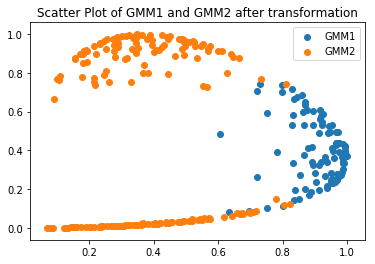

In [136]:
plt.scatter(gmm1_transformed[:,0], gmm1_transformed[:,1], label = 'GMM1')
plt.scatter(gmm2_transformed[:,0], gmm2_transformed[:,1], label = 'GMM2')
plt.title('Scatter Plot of GMM1 and GMM2 after transformation')
plt.legend()
pass